In [2]:
import pandas as pd

file_path = '../data/noshow_data.csv'

df = pd.read_csv(file_path)

display(df.head())

print("\n --- info ---")
df.info()

print("\n --- stat overview ---")
display(df.describe())

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



 --- info ---
<class 'pandas.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  str    
 3   ScheduledDay    110527 non-null  str    
 4   AppointmentDay  110527 non-null  str    
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  str    
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  str    
dtypes: float64(1), int64(8), str(5)
memory usage: 11.8 MB

 --- stat overview


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [4]:
# Rename columns
df = df.rename(columns={
    'Handcap': 'Handicap',
    'Hipertension': 'Hypertension',
    'No-show': 'NoShow'
})

# Convert date columns from str to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

# Remove rows with (age < 0)
df = df[df['Age'] >= 0]

print(f"Rows after cleaning: {len(df)}")
print("\n --- new data types for dates ---")
print(df[['AppointmentDay', 'ScheduledDay']].dtypes)
print(f"\nMin age is: {df['Age'].min()}")

display(df.head())


Rows after cleaning: 110526

 --- new data types for dates ---
AppointmentDay    datetime64[us, UTC]
ScheduledDay      datetime64[us, UTC]
dtype: object

Min age is: 0


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Calculate wait time in days (removing time of day)
df['WaitDays'] = (df['AppointmentDay'].dt.normalize() - df['ScheduledDay'].dt.normalize()).dt.days
print(" -- stat overview (WaitDays) ---")

# Negative wait check
negative_wait = df[df['WaitDays'] < 0]
print(f"\nNumber of negative wait times: {len(negative_wait)}")

display(df[['ScheduledDay', 'AppointmentDay', 'WaitDays', 'NoShow']].head())

 -- stat overview (WaitDays) ---

Number of negative wait times: 5


,ScheduledDay,AppointmentDay,WaitDays,NoShow
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,No
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,No
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,No
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,No
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,No


In [7]:
# Remove negative wait
df = df[df['WaitDays'] >= 0]

display(df.describe())

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitDays
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,10.184345
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15.255153
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


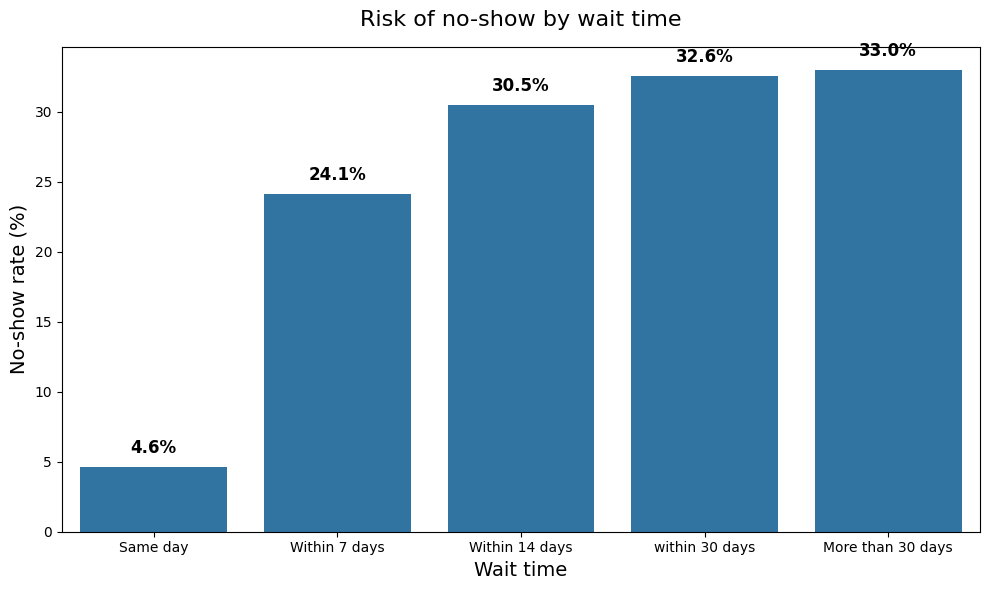

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split wait time into bins
df['NoShow_numeric'] = df['NoShow'].apply(lambda x: 1 if x == 'Yes' else 0)
bins = [-1,0,7,14,30,200]
labels = ['Same day', 'Within 7 days', 'Within 14 days', 'within 30 days', 'More than 30 days']
df['Wait_Category'] = pd.cut(df['WaitDays'], bins=bins, labels=labels)

# No show rates in percentage
noshow_rates = df.groupby('Wait_Category', observed=False)['NoShow_numeric'].mean() * 100

# Plot the result
plt.figure(figsize=(10,6))
ax = sns.barplot(x=noshow_rates.index, y=noshow_rates.values)

plt.title("Risk of no-show by wait time", fontsize=16, pad=15)
plt.xlabel("Wait time", fontsize=14)
plt.ylabel("No-show rate (%)", fontsize=14)

for i, rate in enumerate(noshow_rates.values):
    ax.text(i, rate + 1, f"{rate:.1f}%", ha="center", fontsize=12, fontweight="bold")

plt.tight_layout()

plt.savefig('../notebooks/wait_time_no_show.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()

In [13]:
# Save cleansed data
df.to_csv('../data/noshow_data_clean.csv', index=False)